In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
from heapq import nsmallest
from skimage.feature import hog
from skimage import data, exposure, io
from skimage import color

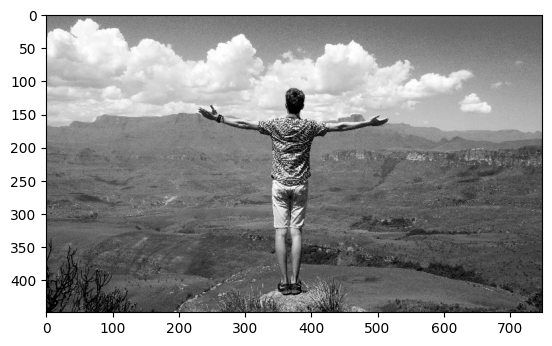

(449, 749)


In [2]:
#image = cv.imread("mask.png")
image = cv.imread("pexels-jjagtenberg-103123.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image = cv.resize(image, (image.shape[1]//8, image.shape[0]//8))
plt.imshow(image, cmap='gray')
plt.show()
print(image.shape)

In [3]:
gauss = [image]
diff = []
keypoints = []
for i in range(1,5):
    gauss.append(cv.GaussianBlur(gauss[i - 1], (3, 3), 0))

for i in range(4):
    diff.append(gauss[i] - gauss[i + 1])

for i in range(1,diff[0].shape[0] - 1):
    for j in range(1,diff[0].shape[1] - 1):
        neighbours1 = np.zeros(27)
        neighbours1[0:9] = np.ndarray.flatten(diff[0][i - 1: i + 2, j - 1: j + 2])
        neighbours1[9:18] = np.ndarray.flatten(diff[1][i - 1: i + 2, j - 1: j + 2])
        neighbours1[18:27] = np.ndarray.flatten(diff[2][i - 1: i + 2, j - 1: j + 2])
        neighbours1[13] = 0

        neighbours2 = np.zeros(27)
        neighbours2[0:9] = np.ndarray.flatten(diff[1][i - 1: i + 2, j - 1: j + 2])
        neighbours2[9:18] = np.ndarray.flatten(diff[2][i - 1: i + 2, j - 1: j + 2])
        neighbours2[18:27] = np.ndarray.flatten(diff[3][i - 1: i + 2, j - 1: j + 2])
        neighbours2[13] = 0

        #if (max(neighbours1) > 0):
        #    print(max(neighbours1), min(neighbours1))
        #    print(max(neighbours2), min(neighbours2))
        #    print(diff[1][i,j])
        #    print(diff[2][i,j])

        if (diff[1][i,j] > max(neighbours1) or diff[2][i,j] > max(neighbours2) or diff[1][i,j] < min(neighbours1) or diff[2][i,j] < min(neighbours2)):
            keypoints.append([i,j])

In [4]:
print(len(keypoints))

1174


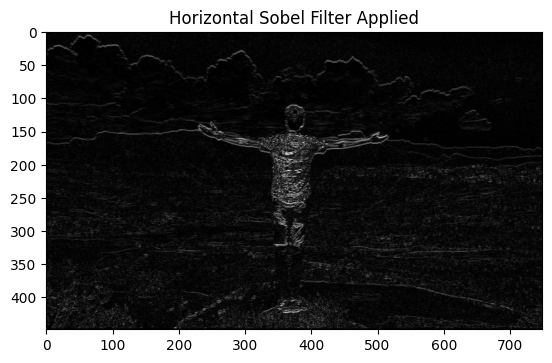

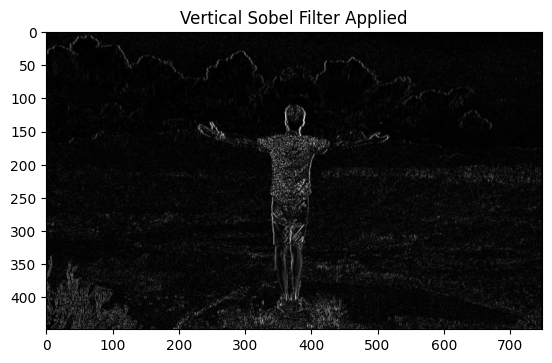

In [21]:
#Task 1
image2 = image/255

Horz_Sobel = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
Vert_Sobel = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])

Horz = cv.filter2D(image2,-1, Horz_Sobel)
Vert = cv.filter2D(image2,-1, Vert_Sobel)


plt.imshow(abs(Horz), cmap='gray')
plt.title("Horizontal Sobel Filter Applied")
plt.show()
plt.imshow(abs(Vert), cmap='gray')
plt.title("Vertical Sobel Filter Applied")
plt.show()

Mag = np.sqrt(np.square(Horz) + np.square(Vert))
Mag = (Mag/np.max(Mag))

Phase = np.int16(np.round(np.arctan2(Vert,Horz)*180/3.1412))
#print(np.unique(Phase))
for row in range(len(Phase)):
    for column in range(len(Phase[row])):
        if (Phase[row,column] < 0):
            Phase[row,column] = 360 + Phase[row,column]
#print(np.unique(Phase))

s = np.array([0,45,90,135,180,225,270,315])
HOG_Keypoints_Flattened = []
for i,j in keypoints:
    if (i < 7 and j < 7):
        continue
    
    Patch = Phase[i-7:i+9,j-7:j+9]
    PatchMag = Mag[i-7:i+9,j-7:j+9]
    
    HOGEntire = []

    for row in range(4):
        for column in range(4):
            HOG = {0:0,45:0,90:0,135:0,180:0,225:0,270:0,315:0}
            SmallPatch = Patch[row*4: (row + 1)*4, column*4: (column + 1)*4]
            SmallPatchMag = PatchMag[row*4: (row + 1)*4, column*4: (column + 1)*4]

            for i in range(len(SmallPatch)):
                for j in range(len(SmallPatch[i])):
                    if (SmallPatch[i,j] >= 337.5):
                        closest = [315,0]
                        sub1 = 1 - abs(SmallPatch[i,j] - (closest[0] + 22.5))/45
                        sub2 = 1 - sub1
                        #sub2 = 1 - abs(360 - Patch[i,j] - (closest[1] + 22.5))/45

                    elif (SmallPatch[i,j] <= 22.5):
                        closest = [315,0]
                        sub1 = 1 - abs(360 + SmallPatch[i,j] - (closest[0] + 22.5))/45
                        sub2 = 1 - sub1
                        #sub2 = 1 - abs(Patch[i,j] - (closest[1] + 22.5))/45
                    
                    else:
                        closest = nsmallest(2, s, key=lambda x: abs(x + 22.5 - Patch[i,j]))
                        sub1 = 1 - abs(SmallPatch[i,j] - (closest[0] + 22.5))/45
                        sub2 = 1 - sub1
                        #sub2 = 1 - abs(Patch[i,j] - (closest[1] + 22.5))/45

                    #print(sub1,sub2)
                    #print(closest,Patch[i,j])

                    HOG[closest[0]] = sub1*SmallPatchMag[i,j] + HOG[closest[0]]
                    HOG[closest[1]] = sub2*SmallPatchMag[i,j] + HOG[closest[1]]

            HOGEntire.append(list(HOG.values()))
            #HOGRow.append(list(HOG.values()))
    HOG_Keypoints_Flattened.append(np.ndarray.flatten(np.array(HOGEntire)))
    #HOG_Keypoints.append(HOGEntire)
    
    


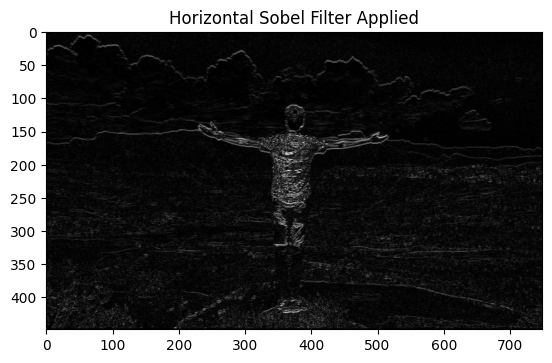

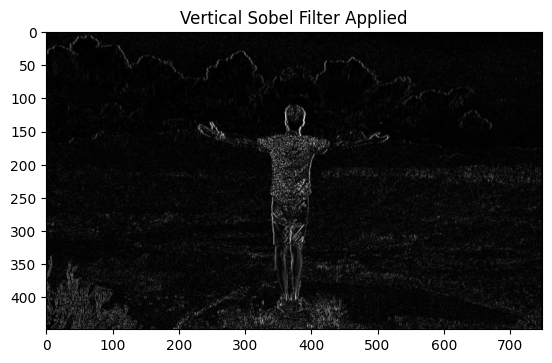

In [15]:
#Task 1
image2 = image/255

Horz_Sobel = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
Vert_Sobel = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])

Horz = cv.filter2D(image2,-1, Horz_Sobel)
Vert = cv.filter2D(image2,-1, Vert_Sobel)

plt.imshow(abs(Horz), cmap='gray')
plt.title("Horizontal Sobel Filter Applied")
plt.show()
plt.imshow(abs(Vert), cmap='gray')
plt.title("Vertical Sobel Filter Applied")
plt.show()

Mag = np.sqrt(np.square(Horz) + np.square(Vert))
Mag = (Mag/np.max(Mag))

Phase = np.int16(np.round(np.arctan2(Vert,Horz)*180/3.1412))
#print(np.unique(Phase))
for row in range(len(Phase)):
    for column in range(len(Phase[row])):
        if (Phase[row,column] < 0):
            Phase[row,column] = 360 + Phase[row,column]
#print(np.unique(Phase))

s = np.array([0,45,90,135,180,225,270,315])
HOG_Keypoints = []
for i,j in keypoints:
    if (i < 7 and j < 7):
        continue
    
    Patch = Phase[i-7:i+9,j-7:j+9]
    PatchMag = Mag[i-7:i+9,j-7:j+9]
    
    HOGEntire = []

    for row in range(4):
        HOGRow = []
        for column in range(4):
            HOG = {0:0,45:0,90:0,135:0,180:0,225:0,270:0,315:0}
            SmallPatch = Patch[row*4: (row + 1)*4, column*4: (column + 1)*4]
            SmallPatchMag = PatchMag[row*4: (row + 1)*4, column*4: (column + 1)*4]

            for i in range(len(SmallPatch)):
                for j in range(len(SmallPatch[i])):
                    if (SmallPatch[i,j] >= 337.5):
                        closest = [315,0]
                        sub1 = 1 - abs(SmallPatch[i,j] - (closest[0] + 22.5))/45
                        sub2 = 1 - sub1
                        #sub2 = 1 - abs(360 - Patch[i,j] - (closest[1] + 22.5))/45

                    elif (SmallPatch[i,j] <= 22.5):
                        closest = [315,0]
                        sub1 = 1 - abs(360 + SmallPatch[i,j] - (closest[0] + 22.5))/45
                        sub2 = 1 - sub1
                        #sub2 = 1 - abs(Patch[i,j] - (closest[1] + 22.5))/45
                    
                    else:
                        closest = nsmallest(2, s, key=lambda x: abs(x + 22.5 - Patch[i,j]))
                        sub1 = 1 - abs(SmallPatch[i,j] - (closest[0] + 22.5))/45
                        sub2 = 1 - sub1
                        #sub2 = 1 - abs(Patch[i,j] - (closest[1] + 22.5))/45

                    #print(sub1,sub2)
                    #print(closest,Patch[i,j])

                    HOG[closest[0]] = sub1*SmallPatchMag[i,j] + HOG[closest[0]]
                    HOG[closest[1]] = sub2*SmallPatchMag[i,j] + HOG[closest[1]]

            
            HOGRow.append(list(HOG.values()))
        HOGEntire.append(HOGRow)
    HOG_Keypoints.append(np.array(HOGEntire))


In [19]:
#This is the descriptor for the keypoints. it can be flattened further to make it 128
HOG_Keypoints = np.array(HOG_Keypoints)
print(HOG_Keypoints.shape)

HOG_Keypoints_Flattened = np.array(HOG_Keypoints_Flattened)
print(HOG_Keypoints_Flattened.shape)

(1174, 4, 4, 8)
(1174, 128)


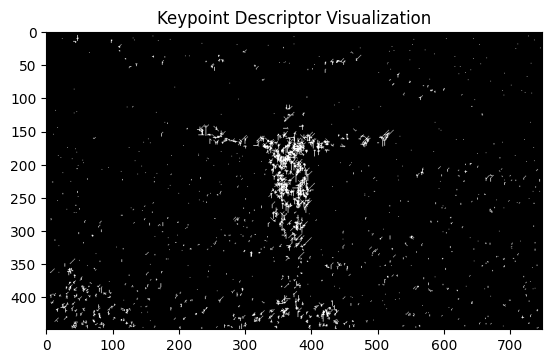

In [22]:
winSize = (64,64)  # Sliding window size
blockSize = (16,16)  # Block size
blockStride = (16,16)  # Block stride
cellSize = (4,4)  # Cell size
nbins = 8  # Number of orientation bins

# HOG feature size: [num_cells_y, num_cells_x, num_bins]
# Calculate the number of cells per image dimension based on input image size and parameters
image_height, image_width = image.shape
cell_height = image_height // cellSize[1]
cell_width = image_width // cellSize[0]

# Create an empty image to draw HOG features
hog_image = np.zeros((image_height, image_width), dtype=np.uint8)

# Loop through the cells and draw the HOG features
for keypoint in range(HOG_Keypoints.shape[0]):
    for i in range(4):
        for j in range(4):
            # For each cell, we can visualize the gradient orientations as arrows
            for bin_idx in range(nbins):
                magnitude = HOG_Keypoints[keypoint, i, j, bin_idx]
                angle = 360 - (bin_idx * (360 / nbins))  # Angle corresponding to the bin. Can add 22.5 to change orientation
                # You can adjust the length of the arrows or vectors here based on magnitude
                if magnitude > 0:
                    #x_center = (j * cellSize[0]) + (cellSize[0] // 2)
                    #y_center = (i * cellSize[1]) + (cellSize[1] // 2)

                    x_center = keypoints[keypoint][1]
                    y_center = keypoints[keypoint][0]
                    
                    length = magnitude  # Length proportional to the magnitude
                    dx = int(length * np.cos(np.deg2rad(angle)))
                    dy = int(length * np.sin(np.deg2rad(angle)))
                    cv.line(hog_image, (x_center, y_center), (x_center + dx, y_center + dy), 255, 1)

# Display the image with HOG features
plt.imshow(hog_image, cmap='gray')
plt.title('Keypoint Descriptor Visualization')
#plt.axis('off')
plt.show()